# Evaluation

#### For the evaluation, we have decided to use the Google Translate API as the baseline to compare our "E-commerce Translation Model".

We will be following the guide provided by the Python Package Indexb (PyPI) to implement the Google Translate API: 
https://pypi.org/project/deep-translator/#google-translate-1

In [18]:
from sklearn.model_selection import train_test_split
from deep_translator import GoogleTranslator
from transformers import pipeline
import pandas
import time
from nltk.translate.bleu_score import sentence_bleu
import matplotlib.pyplot as plt

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
Fontconfig warning: ignoring UTF-8: not a valid region tag
Matplotlib is building the font cache; this may take a moment.


In [11]:
baseline_model = GoogleTranslator(source='auto', target='zh-CN')
evaluating_model = translator = pipeline("text2text-generation", model="duongy18418/E-commerce_Translation_Model")

In [12]:
ecommerce_dataset = pandas.read_csv("./Datasets/Test/Amazon_Ecommerce_Data_2020.csv", usecols=["Category"], nrows=100)
ecommerce_dataset = ecommerce_dataset.dropna()

#### We will be using the same dataset to test the two models, which included 100 entires to translation. While the models are running the translation, we will be keeping track of their total runtime for further comparision

In [13]:
base_en = ecommerce_dataset['Category'].tolist()
base_zh = []

start_time = time.time()
for i in range(len(base_en)):
    base_zh.append(baseline_model.translate(base_en[i]))
end_time = time.time()
base_model_time = end_time - start_time

base_dataset = pandas.DataFrame(list(zip(base_en, base_zh)), columns=['Category-en', 'Category-zh'])
base_dataset.to_csv(f'./Results/base_result.csv', index=False)

In [14]:
eval_en = ecommerce_dataset['Category'].tolist()
eval_zh = []

start_time = time.time()
for i in range(len(eval_en)):
    eval_zh.append(str(evaluating_model(eval_en[i])))
end_time = time.time()
eval_model_time = end_time - start_time

eval_dataset = pandas.DataFrame(list(zip(eval_en, eval_zh)), columns=['Category-en', 'Category-zh'])
eval_dataset.to_csv(f'./Results/eval_result.csv', index=False)

#### We will be using BLEU to evaluate the translated entries from both model and compare them.

In [15]:
base_dataset['BLEU Score'] = base_dataset.apply(lambda row: sentence_bleu(row['Category-en'], row['Category-zh']), axis=1)
base_dataset

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-

,Category-en,Category-zh,BLEU Score
0,"Sports Outdoors Outdoor Recreation Skates, Ska...",户外运动 户外休闲 溜冰鞋、滑板 滑板车 滑板 标准滑板 长板 长板,7.544641e-232
1,Toys Games Learning Education Science Kits Toys,玩具游戏学习教育科学套件玩具,0.000000e+00
2,Toys Games Arts Crafts Craft Kits,玩具游戏艺术工艺品工艺套件,0.000000e+00
3,Toys Games Hobbies Models Model Kits Model Kit...,玩具游戏爱好模型模型套件模型套件飞机套件,0.000000e+00
4,Toys Games Puzzles Jigsaw Puzzles,玩具游戏 拼图 拼图游戏,9.788429e-232
...,...,...,...
95,"Clothing, Shoes Jewelry Costumes Accessories K...",服装、鞋履 珠宝 服装配饰 儿童 女婴服装,8.510469e-232
96,Toys Games Learning Education Science Kits Toys,玩具游戏学习教育科学套件玩具,0.000000e+00
97,Toys Games Dolls Accessories Dolls,玩具 游戏 玩偶 配件 玩偶,9.418382e-232
98,Toys Games Sports Outdoor Play Play Sets Playg...,玩具游戏运动户外游乐套装游乐场设备,0.000000e+00


In [16]:
eval_dataset['BLUE Score'] = eval_dataset.apply(lambda row: sentence_bleu(row['Category-en'], row['Category-zh']), axis=1)
eval_dataset

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-

,Category-en,Category-zh,BLUE Score
0,"Sports Outdoors Outdoor Recreation Skates, Ska...",[{'generated_text': 'en 电子产品 计算机/电脑 电脑组件 存储设备 ...,9.526533e-232
1,Toys Games Learning Education Science Kits Toys,[{'generated_text': 'en 电子产品 计算机/电脑 电脑组件 存储设备 ...,9.073921e-232
2,Toys Games Arts Crafts Craft Kits,[{'generated_text': 'en 电子产品 计算机/电脑 电脑组件 存储设备 ...,8.067983e-232
3,Toys Games Hobbies Models Model Kits Model Kit...,[{'generated_text': 'en 电子产品 计算机/电脑 电脑组件 存储设备 ...,1.051835e-231
4,Toys Games Puzzles Jigsaw Puzzles,[{'generated_text': 'en 电子产品 计算机/电脑 电脑组件 存储设备 ...,7.630227e-232
...,...,...,...
95,"Clothing, Shoes Jewelry Costumes Accessories K...",[{'generated_text': 'en 电子产品 计算机/电脑 电脑组件 存储设备 ...,7.690077e-232
96,Toys Games Learning Education Science Kits Toys,[{'generated_text': 'en 电子产品 计算机/电脑 电脑组件 存储设备 ...,9.073921e-232
97,Toys Games Dolls Accessories Dolls,[{'generated_text': 'en 五金/装修 工具 刀/刀'}],1.030996e-231
98,Toys Games Sports Outdoor Play Play Sets Playg...,[{'generated_text': 'en 电子产品 计算机/电脑 电脑组件 存储设备 ...,1.087541e-231


#### With all the metrics calculated, we created some plot to further illustrate the data.

In [38]:
print("Baseline model runtime:", base_model_time, "seconds")
print("E-Commerce model runtime:", eval_model_time, "seconds")

Baseline model runtime: 22.18173098564148 seconds
E-Commerce model runtime: 287.71928668022156 seconds


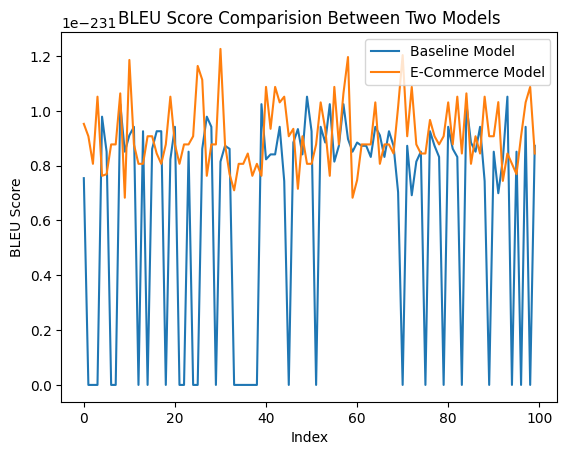

In [35]:
ax = plt.subplot()
ax.plot(base_dataset['BLEU Score'], label='Baseline Model')
ax.plot(eval_dataset['BLUE Score'], label='E-Commerce Model')
ax.set_xlabel('Index')
ax.set_ylabel('BLEU Score')
ax.set_title("BLEU Score Comparision Between Two Models")
ax.legend()

#### From the above graph, the E-Commerce model has a more consistent BLEU score but much longer runtime compare to the baseline model. However, since the BLEU metrix is based on a 0 and 1 scale, both models' results are way below 1 and very close to 0, their results are still not usuable in the real world applications.